In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from scipy.stats import zscore

In [18]:
df = pd.read_csv('std.csv')
print(df.head())

   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.8

In [19]:
df.drop(columns=['Student_ID'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


Checking for, and removing NULLS

In [21]:
print(df.isnull().sum())
df.dropna(inplace=True)

Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64


Label encoding

In [22]:
df['Stress_Level'] = df['Stress_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2


In [23]:
df.corr()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
Study_Hours_Per_Day,1.000000,-0.002629,0.026717,-0.137820,-0.488113,0.734468,0.738843
Extracurricular_Hours_Per_Day,-0.002629,1.000000,0.008844,-0.139081,-0.369989,-0.032174,-0.006099
Sleep_Hours_Per_Day,0.026717,0.008844,1.000000,-0.193556,-0.470302,-0.004278,-0.298917
Social_Hours_Per_Day,-0.137820,-0.139081,-0.193556,1.000000,-0.417142,-0.085677,-0.054702
Physical_Activity_Hours_Per_Day,-0.488113,-0.369989,-0.470302,-0.417142,1.000000,-0.341152,-0.205207
GPA,0.734468,-0.032174,-0.004278,-0.085677,-0.341152,1.000000,0.550395
Stress_Level,0.738843,-0.006099,-0.298917,-0.054702,-0.205207,0.550395,1.000000


Removing features with low correlation with the target

In [25]:
correlations = df.corr(numeric_only=True)['Stress_Level'].abs()
for feature in correlations.index:
    if feature != 'Stress_Level' and correlations[feature] <= 0.2:
        df.drop(columns=feature, inplace=True)
df.corr()

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
Study_Hours_Per_Day,1.000000,0.026717,-0.488113,0.734468,0.738843
Sleep_Hours_Per_Day,0.026717,1.000000,-0.470302,-0.004278,-0.298917
Physical_Activity_Hours_Per_Day,-0.488113,-0.470302,1.000000,-0.341152,-0.205207
GPA,0.734468,-0.004278,-0.341152,1.000000,0.550395
Stress_Level,0.738843,-0.298917,-0.205207,0.550395,1.000000


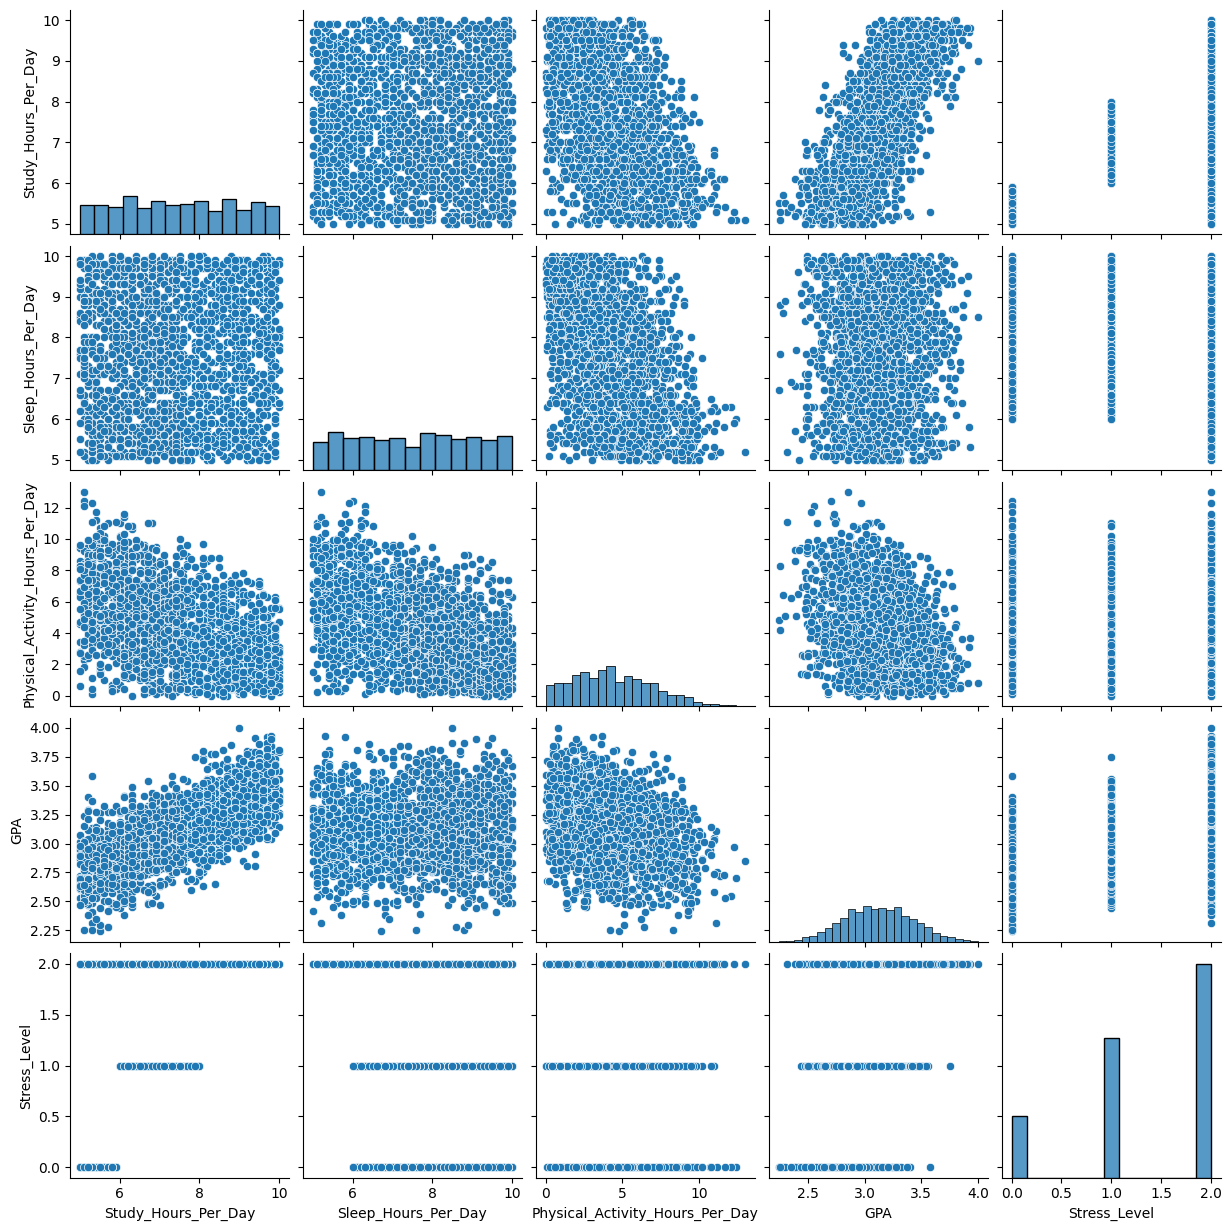

In [26]:
sns.pairplot(df)

In [27]:
df.describe()

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,7.475800,7.501250,4.32830,3.115960,1.366000
std,1.423888,1.460949,2.51411,0.298674,0.727536
min,5.000000,5.000000,0.00000,2.240000,0.000000
25%,6.300000,6.200000,2.40000,2.900000,1.000000
50%,7.400000,7.500000,4.10000,3.110000,2.000000
75%,8.700000,8.800000,6.10000,3.330000,2.000000
max,10.000000,10.000000,13.00000,4.000000,2.000000


Removing outliers

In [28]:
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
print(df.shape)
df = df[(z_scores < 3).all(axis=1)]
print(df.shape)

(2000, 5)
(1996, 5)


In [29]:
x = df.drop(columns="Stress_Level")
y = df["Stress_Level"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Decision Tree model

In [30]:
ADB_DT = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42)
ADB_DT.fit(x_train,y_train)
ADB_DT_pred = ADB_DT.predict(x_test)
print("Decision tree model (with adaBoost) accuracy:", accuracy_score(y_test, ADB_DT_pred))

RF_DT = RandomForestClassifier(random_state=42)
RF_DT.fit(x_train, y_train)
RF_DT_pred = RF_DT.predict(x_test)
print("Decision tree model (with random forest) accuracy:", accuracy_score(y_test, RF_DT_pred))

Decision tree model (with adaBoost) accuracy: 0.97
Decision tree model (with random forest) accuracy: 1.0


In [31]:
x_SS = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_SS, y, test_size=0.2, random_state=42)

Logistic Regression

In [32]:
LOGR = LogisticRegression()
LOGR.fit(x_train, y_train)
LOGR_pred = LOGR.predict(x_test)
print(f'Logistic regression model accuracy: {accuracy_score(y_test, LOGR_pred)}')

Logistic regression model accuracy: 0.8175


KNN model

In [33]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)
print(f'KNN model accuracy: {accuracy_score(y_test, KNN_pred)}')

KNN model accuracy: 0.915


SVM model

In [34]:
x_MM = MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_MM, y, test_size=0.2, random_state=42)

In [35]:
BG_SVC = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
BG_SVC.fit(x_train, y_train)
BG_SVC_pred = BG_SVC.predict(x_test)
print(f'SVC accuracy (with bagging): {accuracy_score(y_test, BG_SVC_pred)}')

SVC accuracy (with bagging): 0.97
